<a href="https://colab.research.google.com/github/fatimabalig/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [21]:
import subprocess
#command to unzip the file
command='unzip "/content/archive (3).zip"'

#execute the command
subprocess.call(command,shell=True)

1

In [22]:
data=pd.read_csv('/content/Churn_Modelling.csv')

# Display the first few rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Display summary statistics and check for missing values
print(data.describe())
print(data.isnull().sum())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [24]:
print(data.shape)

(10000, 14)


In [25]:
# Separate features and target variable
X = data.drop(columns='Exited')
y = data['Exited']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessor for handling both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=[np.number]).columns.tolist()),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipelines for each model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [26]:
# Train Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

# Train Random Forest model
forest_pipeline.fit(X_train, y_train)

# Train Gradient Boosting model
gb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['RowNumber', 'CustomerId',
                                                   'CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [11]:
# Function to print evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

# Evaluate Logistic Regression
print('Logistic Regression:')
evaluate_model(log_reg_pipeline, X_test, y_test)

# Evaluate Random Forest
print('\nRandom Forest:')
evaluate_model(forest_pipeline, X_test, y_test)

# Evaluate Gradient Boosting
print('\nGradient Boosting:')
evaluate_model(gb_pipeline, X_test, y_test)

Logistic Regression:
Confusion Matrix:
[[2307  109]
 [ 459  125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2416
           1       0.53      0.21      0.31       584

    accuracy                           0.81      3000
   macro avg       0.68      0.58      0.60      3000
weighted avg       0.78      0.81      0.78      3000

ROC AUC Score: 0.5844626009253379

Random Forest:
Confusion Matrix:
[[2385   31]
 [ 387  197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2416
           1       0.86      0.34      0.49       584

    accuracy                           0.86      3000
   macro avg       0.86      0.66      0.70      3000
weighted avg       0.86      0.86      0.83      3000

ROC AUC Score: 0.6622488206477366

Gradient Boosting:
Confusion Matrix:
[[2335   81]
 [ 315  269]]

Classification Report:
              

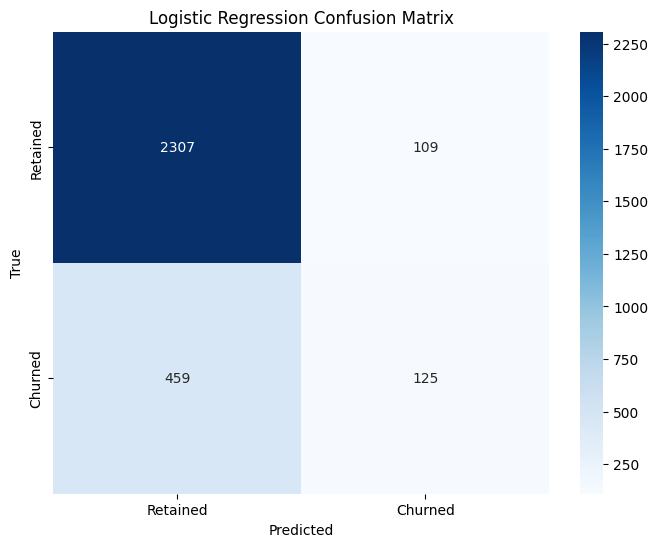

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(log_reg_pipeline, X_test, y_test, 'Logistic Regression Confusion Matrix')

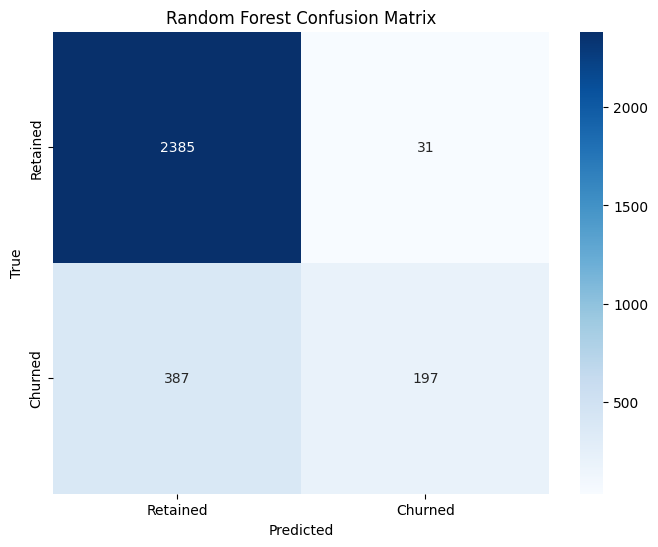

In [13]:
plot_confusion_matrix(forest_pipeline, X_test, y_test, 'Random Forest Confusion Matrix')

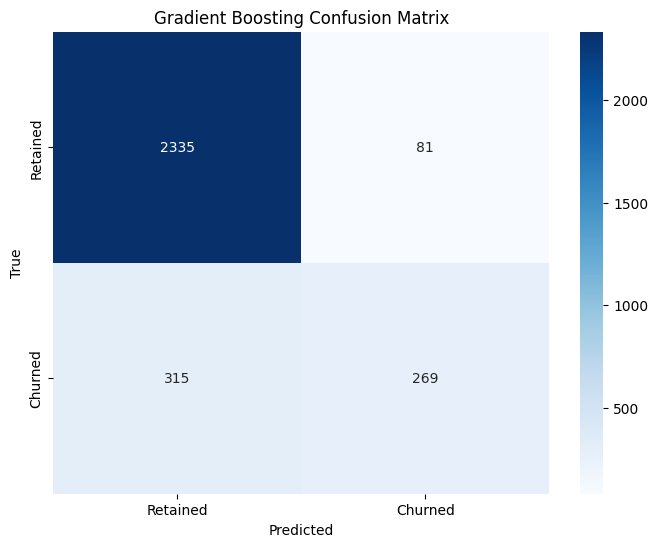

In [14]:
plot_confusion_matrix(gb_pipeline, X_test, y_test, 'Gradient Boosting Confusion Matrix')

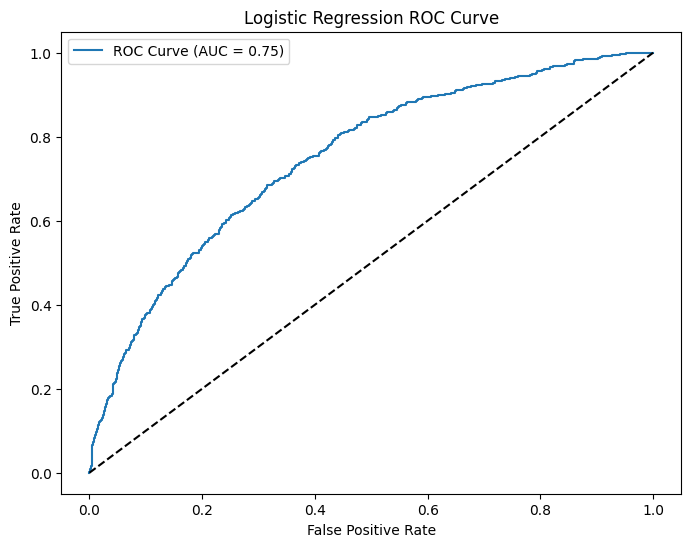

In [19]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Plot ROC curves
plot_roc_curve(log_reg_pipeline, X_test, y_test, 'Logistic Regression ROC Curve')

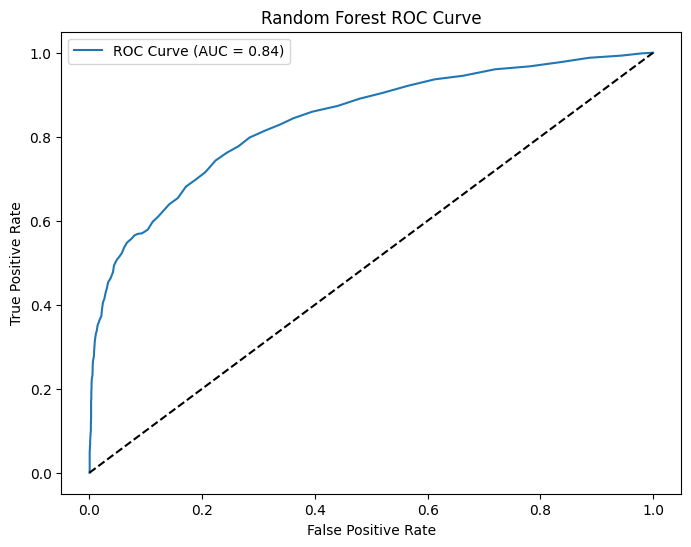

In [17]:
plot_roc_curve(forest_pipeline, X_test, y_test, 'Random Forest ROC Curve')

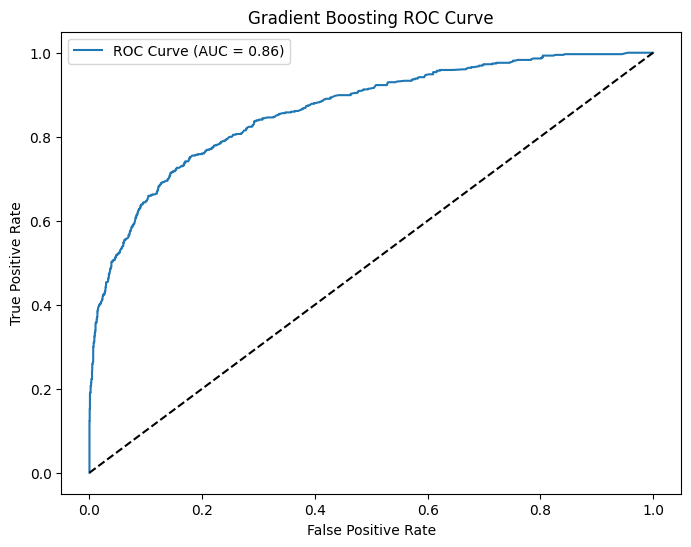

In [18]:
plot_roc_curve(gb_pipeline, X_test, y_test, 'Gradient Boosting ROC Curve')
